In [7]:
import os
os.getcwd()

'C:\\Users\\HP\\Downloads\\data science\\python final project'

In [8]:
os.chdir(r'C:\Users\HP\Downloads\data science')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
train_data=pd.read_csv('Train_Loan_Home.csv')
test_data=pd.read_csv('Test_Loan_Home.csv')
train_data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [13]:
train_data.shape

(614, 13)

In [14]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
train_data['source']='train_data'
test_data['source']='test_data'
data=pd.concat([train_data,test_data],ignore_index=True,sort=True)
print(train_data.shape,test_data.shape,data.shape)

(614, 14) (367, 13) (981, 14)


In [16]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [17]:
#missing values
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

In [18]:
data.apply(lambda x:len(x.unique()))

ApplicantIncome      752
CoapplicantIncome    437
Credit_History         3
Dependents             5
Education              2
Gender                 3
LoanAmount           233
Loan_Amount_Term      13
Loan_ID              981
Loan_Status            3
Married                3
Property_Area          3
Self_Employed          3
source                 2
dtype: int64

In [19]:
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
source                object
dtype: object

In [20]:
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]=='object']

In [21]:
categorical_columns=[x for x in categorical_columns 
                    if x not in ['Loan_ID','source']]

In [22]:
for col in categorical_columns:
    print ('\nFrequency of categories for variable %s'%col)
    print(data[col].value_counts())


Frequency of categories for variable Dependents
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

Frequency of categories for variable Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64

Frequency of categories for variable Gender
Male      775
Female    182
Name: Gender, dtype: int64

Frequency of categories for variable Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64

Frequency of categories for variable Married
Yes    631
No     347
Name: Married, dtype: int64

Frequency of categories for variable Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

Frequency of categories for variable Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64


In [23]:
categorical_columns

['Dependents',
 'Education',
 'Gender',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed']

count      957
unique       2
top       Male
freq       775
Name: Gender, dtype: object


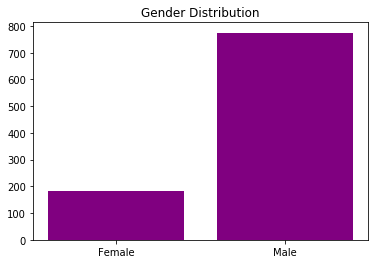

In [24]:
# Gender Distribution
print(data['Gender'].describe())
plt.bar(['Female','Male'],data.groupby(['Gender'])['Gender'].count(),color='purple')
plt.title('Gender Distribution')
plt.show()

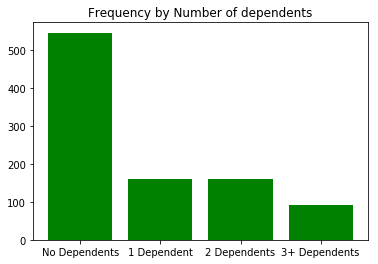

In [25]:
#print(data.groupby(['Dependents'])['Dependents'].count())
plt.bar(['No Dependents','1 Dependent','2 Dependents','3+ Dependents'],data.groupby(['Dependents'])['Dependents'].count(),color='green')
plt.title('Frequency by Number of dependents')
plt.show()

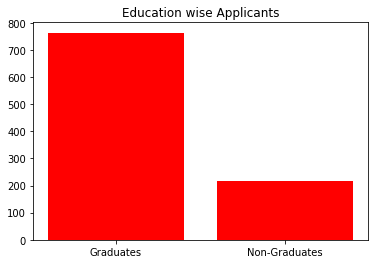

In [26]:
plt.bar(['Graduates','Non-Graduates'],data.groupby(['Education'])['Education'].count(),color='red')
plt.title('Education wise Applicants')
plt.show()

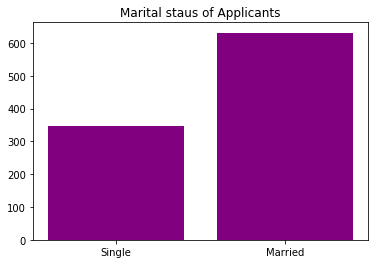

In [27]:
#print(data.groupby(['Married'])['Married'].count())
plt.bar(['Single','Married'],data.groupby(['Married'])['Married'].count(),color='purple')
plt.title('Marital staus of Applicants')
plt.show()

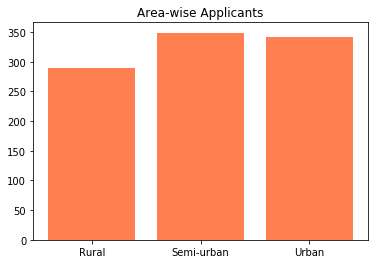

In [28]:
#print(data.groupby(['Property_Area'])['Property_Area'].count())
plt.bar(['Rural','Semi-urban','Urban'],data.groupby(['Property_Area'])['Property_Area'].count(),color='coral')
plt.title('Area-wise Applicants')
plt.show()

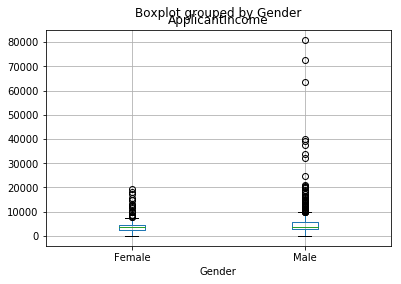

In [29]:
%matplotlib inline 
data.boxplot(by='Gender', column=['ApplicantIncome'])


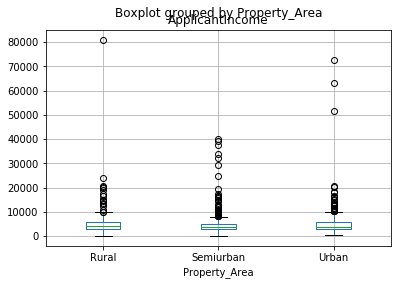

In [30]:
%matplotlib inline
data.boxplot(by='Property_Area', column=['ApplicantIncome'])

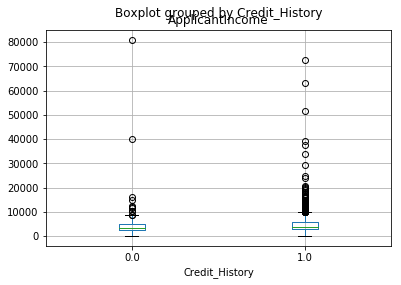

In [31]:
data.boxplot(by='Credit_History', column=['ApplicantIncome'])

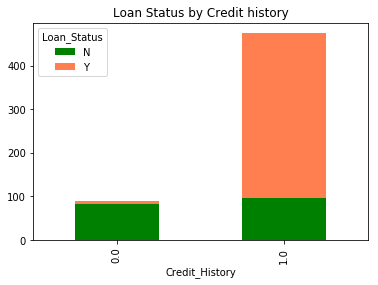

In [32]:
ct1=pd.crosstab(data['Credit_History'],data['Loan_Status'])
ct1.plot(kind='bar',stacked=True, color=['green','coral'],grid=False,title= "Loan Status by Credit history")



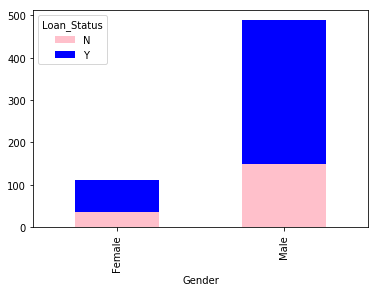

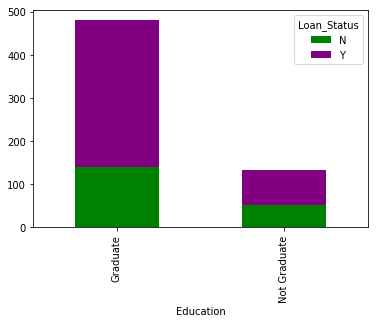

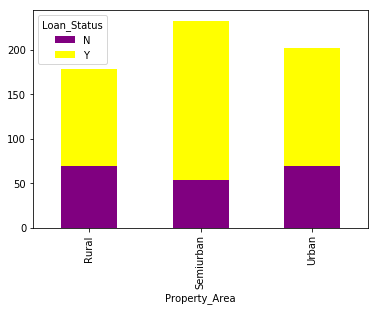

In [33]:
ct2=pd.crosstab(data['Gender'],data['Loan_Status'])
ct2.plot(kind='bar',stacked=True, color=['pink','blue'],grid=False)

ct3=pd.crosstab(data['Education'],data['Loan_Status'])
ct3.plot(kind='bar',stacked=True, color=['green','purple'],grid=False)

ct4=pd.crosstab(data['Property_Area'],data['Loan_Status'])
ct4.plot(kind='bar',stacked=True, color=['purple','yellow'],grid=False)



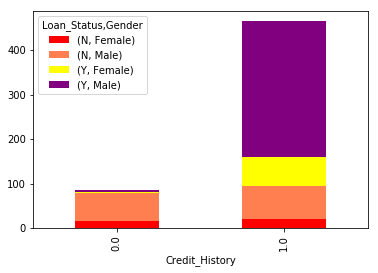

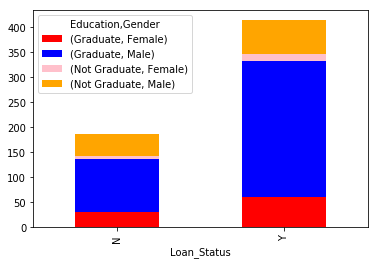

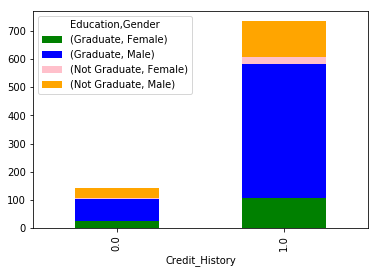

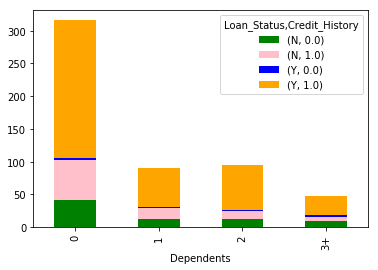

In [34]:
mct1=pd.crosstab(data['Credit_History'],[data['Loan_Status'],data['Gender']])
mct1.plot(kind='bar',stacked=True,color=['red','coral','yellow','purple'])

mct2=pd.crosstab(data['Loan_Status'],[data['Education'],data['Gender']])
mct2.plot(kind='bar',stacked=True, color=['red','blue','pink','orange'])

mct3=pd.crosstab(data['Credit_History'],[data['Education'],data['Gender']])
mct3.plot(kind='bar',stacked=True,color=['green','blue','pink','orange'])

mct3=pd.crosstab(data['Dependents'],[data['Loan_Status'],data['Credit_History']])
mct3.plot(kind='bar',stacked=True,color=['green','pink','blue','orange'])



ApplicantIncome       0
CoapplicantIncome     0
Credit_History       79
Dependents           25
Education             0
Gender               24
LoanAmount           27
Loan_Amount_Term     20
Loan_ID               0
Married               3
Property_Area         0
Self_Employed        55
source                0
dtype: int64


<BarContainer object of 13 artists>

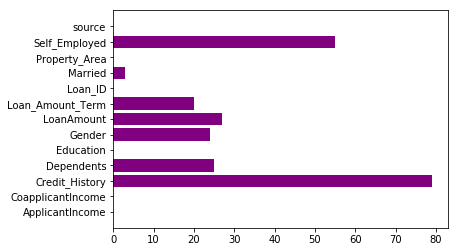

In [35]:
#Missing data
Features=pd.DataFrame.copy(data)
Features=Features.drop(columns='Loan_Status')
missing=len(Features.index) - Features.count()
print(missing)
plt.barh(Features.columns,missing,color='purple')

In [36]:
#Data Cleaning
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
source                0
dtype: int64

In [37]:
col=['Gender','Married','Dependents','Self_Employed','Credit_History']
for val in col:
    train_data[val].fillna(train_data[val].mode()[0], inplace=True)
    test_data[val].fillna(test_data[val].mode()[0],inplace=True)

In [38]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
source                0
dtype: int64

Text(0.5,1,'Loan Amount Term Frequency')

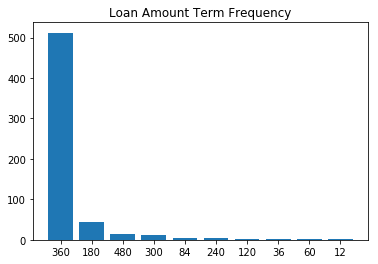

In [39]:
train_data['Loan_Amount_Term'].value_counts()
plt.bar(['360','180','480','300','84','240','120','36','60','12'],train_data['Loan_Amount_Term'].value_counts())
plt.title("Loan Amount Term Frequency")

In [40]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [41]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
source               0
dtype: int64

In [42]:
test_data['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [43]:
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)


In [44]:
# Replacing the missing value in LoanAmount based on the values of Self_Employed and Education Variable
table = train_data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fillamt(x):
    return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
train_data['LoanAmount'].fillna(train_data[train_data['LoanAmount'].isnull()].apply(fillamt, axis=1), inplace=True)
   

In [45]:
train_data['LoanAmount'].isnull().sum()


0

In [46]:
table_tst = test_data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fillamt(x):
    return table_tst.loc[x['Self_Employed'],x['Education']]

# Replace missing values
test_data['LoanAmount'].fillna(test_data[test_data['LoanAmount'].isnull()].apply(fillamt, axis=1), inplace=True)

In [47]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
source               0
dtype: int64

In [48]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
source               0
dtype: int64

In [49]:
#Feature Engineering
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
test_data['Total_Income']=test_data['ApplicantIncome']+test_data['CoapplicantIncome']

In [50]:
import numpy as np

def set_income(value):
    if value in range(1000,25000):
        return 1
    elif value in range(250001,50000):
        return 2
    elif value in range(50001,75000):
        return 3
    elif value in range(75001,100000):
        return 4

In [51]:
train_data['Income']=train_data['Total_Income'].apply(set_income)
test_data['Income']=test_data['Total_Income'].apply(set_income)
train_data['Loan_Amount_Term']=train_data[['Loan_Amount_Term']]/12

In [52]:
test_data['Loan_Amount_Term']=test_data[['Loan_Amount_Term']]/12

In [53]:
train_data['LoanAmount_Log']=np.log(train_data['LoanAmount'])
test_data['LoanAmount_Log']=np.log(test_data['LoanAmount'])

In [54]:
#Feature Engineering
from sklearn.preprocessing import LabelEncoder
cat_var = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area','Income','LoanAmount_Log']
le = LabelEncoder()
for i in cat_var:
    train_data[i] = le.fit_transform(train_data[i])
train_data.dtypes 
train_data.to_excel('TrainDataset.xlsx')

In [55]:
cat_var_tst=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area','Income','LoanAmount_Log']
le_tst=LabelEncoder()
for i in cat_var_tst:
    test_data[i] = le.fit_transform(test_data[i])
test_data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History       float64
Property_Area          int64
source                object
Total_Income           int64
Income                 int64
LoanAmount_Log         int64
dtype: object

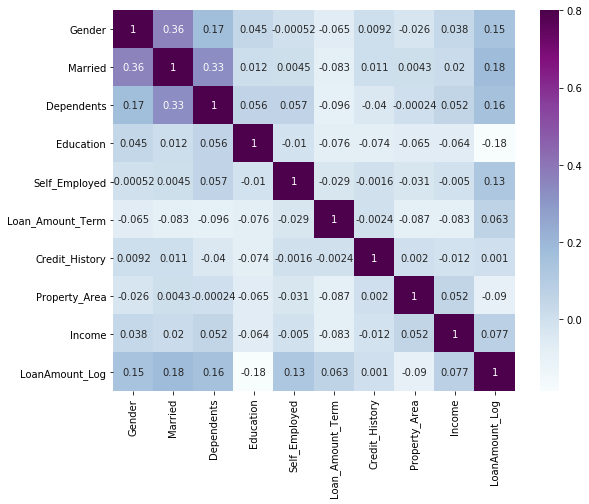

In [56]:
# Print correlation matrix
CorData=pd.DataFrame.copy(train_data)
CorData=CorData.drop(columns=['LoanAmount','ApplicantIncome','CoapplicantIncome','Total_Income'])
loan_corr = CorData.corr()
ax = plt.subplots(figsize=(9,7))
sns.heatmap(loan_corr,annot=True, vmax=0.8,cmap="BuPu");

In [57]:
#Define target and ID columns:
target = ['Loan_Status'] 
predictors = ['Gender','Married','Dependents','Credit_History','Property_Area']
#predictors=['Gender', 'Married', 'Dependents','Education','Self_Employed','Loan_Amount_Term', 'Credit_History',
            #'Property_Area','Income','LoanAmount_Log']

In [58]:
#Import models from scikit learn module:

from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn import metrics

#Function for making a general classification model to which you can pass instance of the algorithm and data:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
   
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 
  


Accuracy : 80.945%
Cross-Validation Score : 80.946%


Text(0.5,1,'Test Results of the Model')

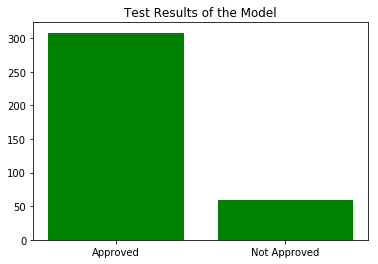

In [72]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classification_model(model, train_data,predictors,target)
# Predictions
pred_lr=model.predict(test_data[predictors])
test_data['Loan_Status']=pred_lr
import numpy as np
plt.bar(['Approved','Not Approved'],test_data['Loan_Status'].value_counts(),color='green')
plt.title("Test Results of the Model")


Accuracy : 81.759%
Cross-Validation Score : 79.645%


Text(0.5,1,'Test Results of the Model')

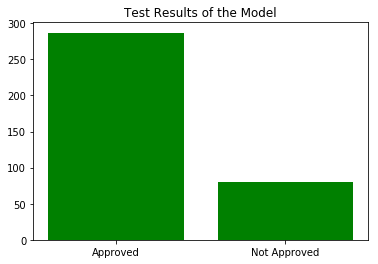

In [60]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classification_model(model, train_data,predictors,target)
pred_lr=model.predict(test_data[predictors])
test_data['Loan_Status']=pred_lr

plt.bar(['Approved','Not Approved'],test_data['Loan_Status'].value_counts(),color='green')
plt.title("Test Results of the Model")

Accuracy : 81.270%
Cross-Validation Score : 80.458%


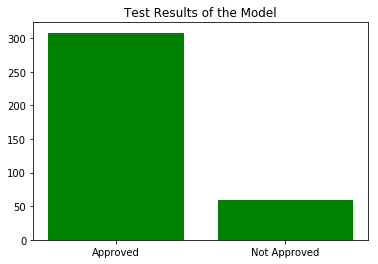

In [73]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=25, min_samples_split=15, max_depth=7, max_features=1)
classification_model(rfc, train_data,predictors,target)
# Predictions
pred_lr=model.predict(test_data[predictors])
test_data['Loan_Status']=pred_lr

plt.bar(['Approved','Not Approved'],test_data['Loan_Status'].value_counts(),color='green')
plt.title("Test Results of the Model")
test_data.to_csv('Results.csv')

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Text(0.5,1,'Test Results of the Model')

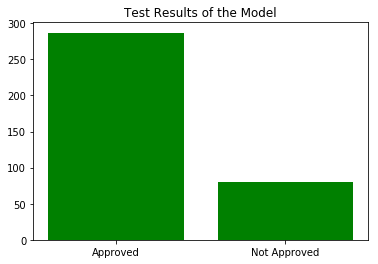

In [66]:
# Support Vector machines
from sklearn.svm import SVC
sv = SVC(degree= 1)
classification_model(sv, train_data,predictors,target)
# Predictions
pred_lr=model.predict(test_data[predictors])
test_data['Loan_Status']=pred_lr
plt.bar(['Approved','Not Approved'],test_data['Loan_Status'].value_counts(),color='green')
plt.title("Test Results of the Model")